# Introduction

This notebook provides a replicate of my work as a research assistant at Trinity College. I'll leave out the data cleansing part which I did for a first couple of months and only focus on the modelling here. 
You can check the data cleansing and EDA in the notebooks mentioned above

Paper: *Product Differentiation in the Automobiles Market: An Empirical Analysis* (Rasha Ahmed and Mark Stater) <br>
Research Assistant: My Phung

Summary of findings:

1. **Results:** Final R_squared: **0.7984** | Final MSE: **0.0024**
2. The signs of the coefficients allign with our research, such as follows:
 - The bigger the weight is, the less energy efficient the car would be
 - All else equal, having the label 'Lux' could imply that the car is more energy efficient than average. THis means that luxury cars are produced to overperform non-luxury ones.
3. The model can be improved by solving multicollinearity or adding more meaningful features.*

## Part 1&2: Data cleaning and EDA

Check out this note book: https://github.com/Emmyphung/car_models/blob/master/car_EDA.ipynb

## Part 3: Modelling

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [3]:
data_full = pd.read_csv('car_data_full.csv')
data_full.head()

C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,4,6,8,10,18,20,26,28,30,35,36,40,43,44,47,48,49,50,52,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,year,mtfname,mtf,segmentname,segment,makeandseries,doors,style,stylenum,...,large,manual_2005,manual_2006,manual_2007,manual_2008,manual_2009,manual_2010,manual_2011,manual_2012,manual_2013
0,2,0.0,Acura,1.0,LUX,4.0,3.5RL,4.0,sedan,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0.0,Acura,1.0,LUX,4.0,RSX,2.0,coupe,4.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,Acura,1.0,LUX,4.0,RSX Type-S,2.0,coupe,4.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.0,Acura,1.0,LUX,4.0,3.2TL,4.0,sedan,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.0,Acura,1.0,MID,2.0,TSX,2.0,coupe,4.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Feature selection**:
1. Find out which columns are highly correlated with our target variable, 'avgmpg'. We would use them for our baseline models.
2. We should not variables that are too highly correlated with one another, such as ['length', 'width', 'wheelbase', 'curbweight'] or ['torque', 'torque3'] to **avoid multi-collinearity**.
3. We first focus on the original columns in this dataset, columns 0 to 57.

**Data leakage**:

Three variables that are too highly correlated with 'avgmpg' are 'mpgcity', 'mpghwy', 'anothermeasureofavgmpg'. It is because our target variable is generated from these variables. We should leave them out of our baseline model to avoid data leakage.

In [4]:
data_full.columns.tolist()

['Unnamed: 0',
 'year',
 'mtfname',
 'mtf',
 'segmentname',
 'segment',
 'makeandseries',
 'doors',
 'style',
 'stylenum',
 'drivetype',
 'drivetypenum',
 'wheelbase',
 'length',
 'width',
 'height',
 'size',
 'curbweight',
 'enginetypename',
 'enginetype',
 'cylindername',
 'cylinder',
 'cid',
 'sizecc',
 'liter',
 'valvescyl',
 'fuelsysinj',
 'fsnum',
 'fuelsysintake',
 'fuelintakenum',
 'mpgfuel',
 'mpgfueltype',
 'borestroke1',
 'borestroke2',
 'borestroke3',
 'borestroke4',
 'compratio',
 'horsepower',
 'hprpm',
 'torque',
 'torque2',
 'torque3',
 'torquerpm',
 'transmission',
 'transmissioninitial',
 'transmissionnum',
 'speed',
 'opt',
 'tractioncont',
 'stabilitycont',
 'whlabs',
 'avgmpg',
 'e85fuelcomp',
 'retailp',
 'guzzlertax',
 'mpgcity',
 'mpghwy',
 'anothermeasureofavgmpg',
 'year0',
 'year1',
 'year2',
 'year3',
 'year4',
 'year5',
 'year6',
 'year7',
 'year8',
 'log_mpg',
 'log_hp',
 'log_torque',
 'log_weight',
 'price',
 'log_weight2',
 'log_hp2',
 'log_torque2',
 '

**Correlation matrix**

In [5]:
use_cols = data_full.columns.tolist()[:55] #Here we leave out 'mpghwy' and 'mpgcity' to avoid data leakage.
corr = data_full[use_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

**Plot of features that are correlated with 'avgmpg'**

In [6]:
high_corr = corr[abs(corr['avgmpg']) >0.5]['avgmpg'].index.tolist()

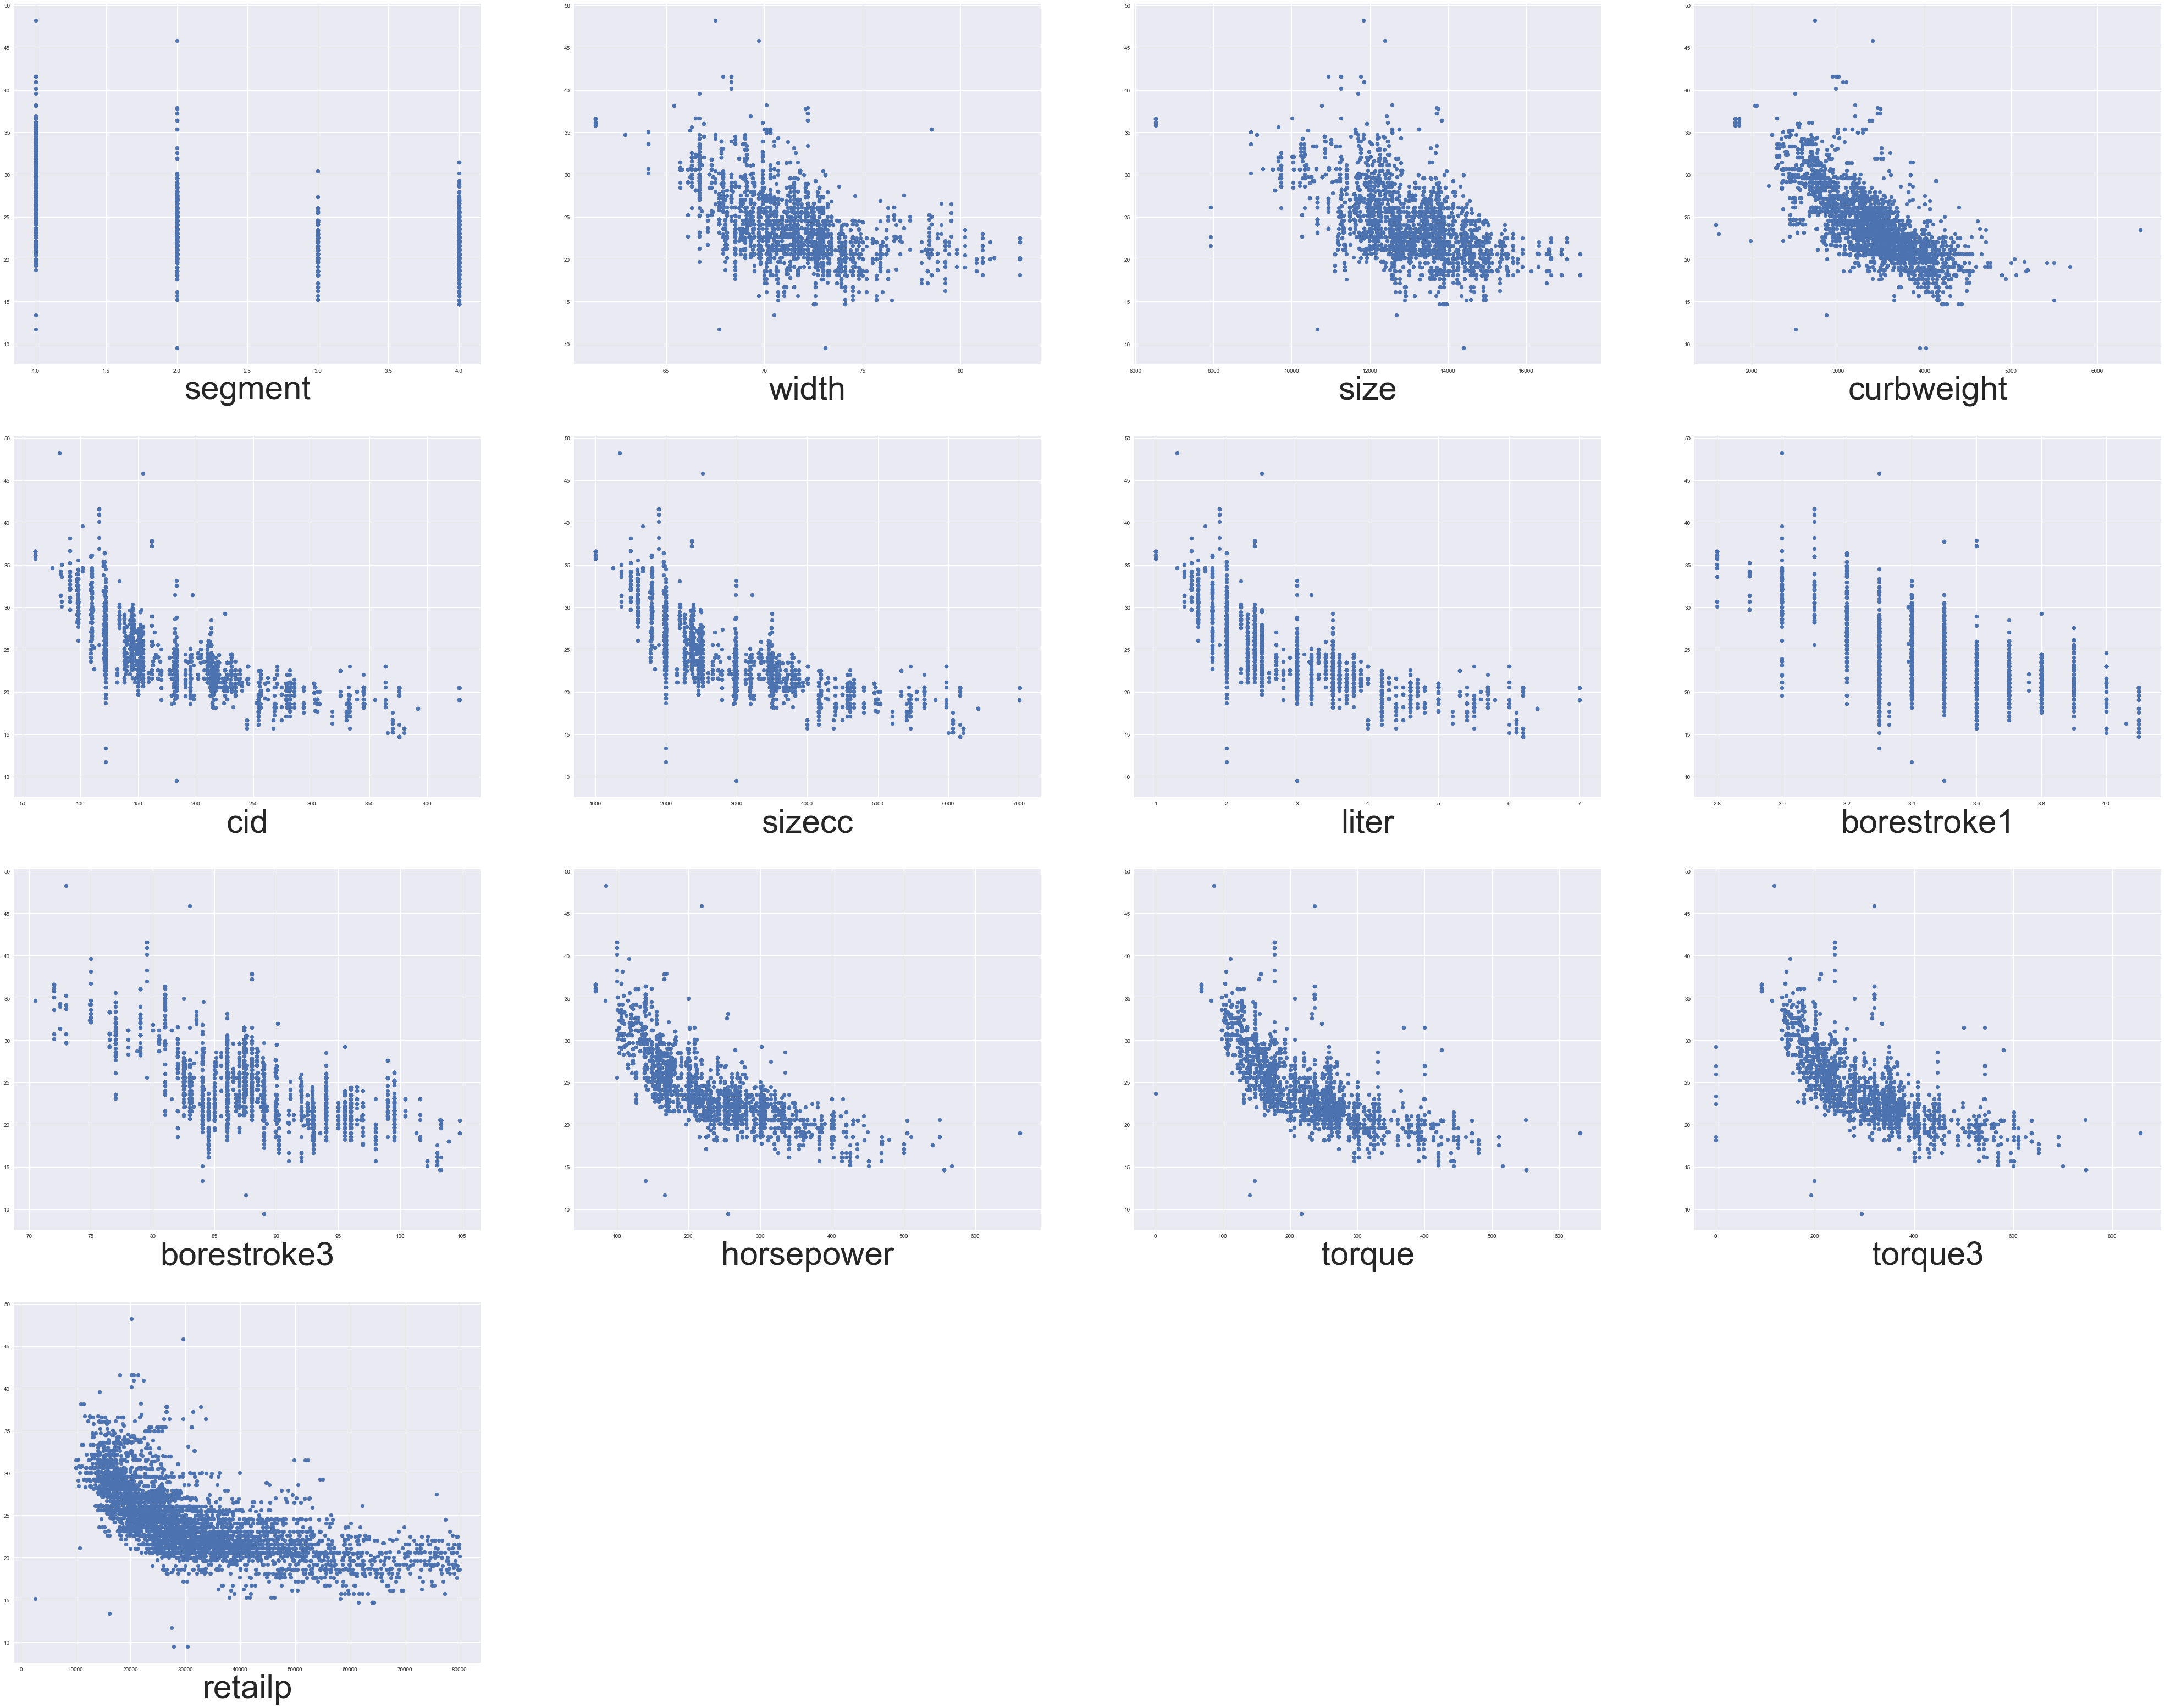

In [12]:
#high_corr.remove('avgmpg')
plt.figure(figsize=(70,70))

for count,i in enumerate(high_corr):
    mpl.style.use('seaborn')
    plt.subplot(5,4,count+1)
    plt.scatter(data_full[i],data_full['avgmpg'])
    plt.xlabel(str(i), fontsize = 60)
    plt.xlabel(str(i), fontsize = 60)
    

**Baseline model**

In the baseline model, I will include all of the features mentioned above. For features that are too highly correlated (measure almost the same things), I will pick one.

In [8]:
high_corr

['segment',
 'width',
 'size',
 'curbweight',
 'cid',
 'sizecc',
 'liter',
 'borestroke1',
 'borestroke3',
 'horsepower',
 'torque',
 'torque3',
 'retailp']

**Normalized data**

Instead of using 'retail price', I will use 'price', a normalized version of 'retail price', which is also adjusted for inflation over years.

In [19]:
base_cols = high_corr
# base_cols.remove('borestroke3')
# base_cols.remove('torque3')
# base_cols.remove('retailp')
# base_cols.append('price')

X_base = data_full[base_cols]
X_base = sm.add_constant(X_base)
y = data_full['avgmpg']

#X_scaled = preprocessing.scale(X_base)

C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [77]:
def perform_linear_regression(X, Y):
    X = sm.add_constant(X)
    test_size = 0.25
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=1)
    
    LR = LinearRegression()
    LR.fit(X_train, y_train)

    y_pred = LR.predict(X_test)
    
    #Print results
    MSE = mean_squared_error(y_test,y_pred)
    print('MSE = %0.3f' % MSE)
    
    model=sm.OLS(y_train,X_train)
    result=model.fit()
    rsquared = result.rsquared
    print('R_squared = %0.3f' % rsquared)
          
    print(result.summary2())
    
    return y_pred

In [78]:
y_pred = perform_linear_regression(X_base, y)

MSE = 2.222
R_squared = 0.708
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.708     
Dependent Variable: avgmpg           AIC:                27447.3712
Date:               2020-01-23 17:23 BIC:                27530.3370
No. Observations:   7434             Log-Likelihood:     -13712.   
Df Model:           11               F-statistic:        1636.     
Df Residuals:       7422             Prob (F-statistic): 0.00      
R-squared:          0.708            Scale:              2.3459    
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const          57.2305    1.0556   54.2154  0.0000  55.1612  59.2998
segment        -0.2671    0.0331   -8.0632  0.0000  -0.3321  -0.2022
width          -0.1495    0.0186   -8.0450  0.0000  -0.1859  -0.1130
size            0.0005    0.00

C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Improve our model by eliminating multi-collinear features.**

Further feature selections were done as we consult experts, read more paper on the topic and research carefully about each feature.

In the case below, we successfully increase our R_squared but obtain a lower MSE.

In [113]:
iterate_cols = ['curbweight','segment','horsepower','sizecc','torque','price']

X = data_full[iterate_cols]
y_pred = perform_linear_regression(X, y)

MSE = 2.374
R_squared = 0.679
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.679     
Dependent Variable: avgmpg           AIC:                28139.2182
Date:               2020-01-23 17:43 BIC:                28187.6149
No. Observations:   7434             Log-Likelihood:     -14063.   
Df Model:           6                F-statistic:        2619.     
Df Residuals:       7427             Prob (F-statistic): 0.00      
R-squared:          0.679            Scale:              2.5764    
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const          40.2090    0.2132  188.5882  0.0000  39.7910  40.6269
curbweight     -0.0029    0.0001  -32.9398  0.0000  -0.0031  -0.0027
segment        -0.1108    0.0341   -3.2531  0.0011  -0.1776  -0.0440
horsepower     -0.0327    0.00

C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Part 4: Feature transformation and model selection

As demonstrated in the plots above and in the EDA, most of the features tend to have a non-linear relationship with the target variable. Here I transform them using log, and log-square.

In this way, we would have a lin-log model (if our independent features are in log() form and the target variable is linear) or double log model (if both target and independent features are in log() forms).

By checking the correlations, we can see the features in the log() form have higher correlations to our target variable.

**Segment**

Instead of using 'segment' for all four types, we are going to use a binary feature named 'lux' to capture the differences between a labeled-luxury car vs a non-luxury one.

In [80]:
data_full['log_sizecc'] = np.log(data_full['sizecc'])
data_full['log_price'] = np.log(data_full['price'])

In [81]:
corr_full = data_full.corr()
corr_full[abs(corr_full['avgmpg']) >0.5]['avgmpg']

segment                  -0.542833
width                    -0.555120
size                     -0.552430
curbweight               -0.737577
cid                      -0.749456
sizecc                   -0.751668
liter                    -0.751561
borestroke1              -0.583867
borestroke3              -0.639602
horsepower               -0.775536
torque                   -0.740622
torque3                  -0.734850
avgmpg                    1.000000
retailp                  -0.600007
mpgcity                   0.979152
mpghwy                    0.972797
anothermeasureofavgmpg    0.995948
log_mpg                   0.991969
log_hp                   -0.821986
log_torque               -0.786066
log_weight               -0.745545
price                    -0.600091
log_weight2              -0.745331
log_hp2                  -0.816200
log_torque2              -0.780682
log_weight_hp            -0.832943
log_weight_torque        -0.799805
log_hp_torque            -0.807945
fwd                 

In [111]:
#Quickly check multicollinearity
from scipy import linalg
print(np.linalg.det(corr))

3.7366544827143324e-25


**Lin-log model**

In [101]:
#The features are selected based on high correlations (check the list above)
log_features = ['log_weight','log_hp','log_torque','log_sizecc','log_price','lux','fwd','I4','small']
y_lin = data_full['avgmpg']
X_log = data_full[log_features]
y_pred = perform_linear_regression(X_log, y_lin)

MSE = 1.869
R_squared = 0.739
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.739     
Dependent Variable: avgmpg           AIC:                26610.3715
Date:               2020-01-23 17:29 BIC:                26679.5097
No. Observations:   7434             Log-Likelihood:     -13295.   
Df Model:           9                F-statistic:        2335.     
Df Residuals:       7424             Prob (F-statistic): 0.00      
R-squared:          0.739            Scale:              2.0966    
--------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
const       121.0872    2.3013   52.6173  0.0000  116.5760  125.5983
log_weight   -6.7256    0.3203  -20.9998  0.0000   -7.3534   -6.0977
log_hp       -7.0268    0.2635  -26.6701  0.0000   -7.5433   -6.5104
log_torque    3.9714    0.2631

C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Double-log model**

In [103]:
#Here I include some other binary features that are 1) within the same categories as the existed one 
#and 2) fairly frequently observed in our datasets. 
log_features = ['log_weight','log_hp','log_torque','log_sizecc','log_price','lux','small','fwd', 'rwd','I4','V6','V8']
y_log = data_full['log_mpg']
X_log = data_full[log_features]
y_pred = perform_linear_regression(X_log, y_log)

MSE = 0.003
R_squared = 0.762
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.761      
Dependent Variable: log_mpg          AIC:                -21911.5011
Date:               2020-01-23 17:31 BIC:                -21821.6214
No. Observations:   7434             Log-Likelihood:     10969.     
Df Model:           12               F-statistic:        1977.      
Df Residuals:       7421             Prob (F-statistic): 0.00       
R-squared:          0.762            Scale:              0.0030669  
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            6.9051    0.0992   69.6166  0.0000   6.7107   7.0996
log_weight      -0.2212    0.0133  -16.6206  0.0000  -0.2473  -0.1951
log_hp          -0.2522    0.0105  -24.1063  0.0000  -0.2728  -0.2317
log_torque       

C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Here I've found the most optimal functional form, which is the double log model. 

**Final R_squared: 0.999** <br>
**Final MSE: 0.003**

However, my model could be overfit. I would use cross-validation to test it.

**Cross validation**

In [98]:
from sklearn.model_selection import KFold
np.random.seed(1)

def val_doublelog(x,y, fold_num):
    x = sm.add_constant(x)

    kf = KFold(n_splits=fold_num, shuffle = True)

    MSE = []
    R_squared = []

    for i in range (fold_num):
        result = next(kf.split(x),None)
        x_train = x.iloc[result[0]]
        x_val = x.iloc[result[1]]

        y_train = y.iloc[result[0]]
        y_val = y.iloc[result[1]]
   
        LR = LinearRegression()
        LR.fit(x_train, y_train)

        y_pred = LR.predict(x_val)
    
        #Read in results
        MSE_k = mean_squared_error(y_val,y_pred)
        MSE.append(MSE_k)
        
        model=sm.OLS(y_train,x_train)
        result=model.fit()
        R_squared_k = result.rsquared
        R_squared.append(R_squared_k)
    

    return MSE, R_squared

C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0.5, 1.0, 'Plot of MSE in 10 folds with mean MSE= 0.0027')

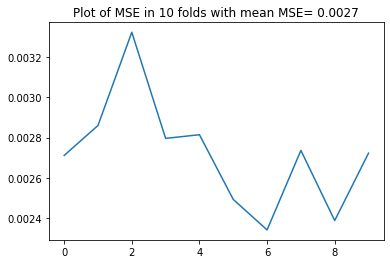

In [99]:
MSE, R_squared = val_doublelog(X_log,y_log, 10)
plt.plot(MSE)
plt.title('Plot of MSE in 10 folds with mean MSE= %0.4f' %np.array(MSE).mean())

In [100]:
print('Average R_squared= %0.4f' %np.array(R_squared).mean())

Average R_squared= 0.7618


**Year-fixed effects**

To controll for serial correlation (variables change overtime), I add binary variables for years: year2005, year2006, etc.

In [114]:
log_features = ['log_weight','log_hp','log_torque','log_sizecc','log_price','lux','small','fwd', 'rwd','I4','V6','V8',
                'year2005','year2006','year2007','year2008','year2009','year2011','year2012','year2013']
y_log_yearfixed = data_full['log_mpg']
X_log_yearfixed = data_full[log_features]
y_pred = perform_linear_regression(X_log_yearfixed, y_log_yearfixed)

MSE = 0.002
R_squared = 0.797
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.797      
Dependent Variable: log_mpg          AIC:                -23090.0674
Date:               2020-01-23 17:44 BIC:                -22944.8772
No. Observations:   7434             Log-Likelihood:     11566.     
Df Model:           20               F-statistic:        1456.      
Df Residuals:       7413             Prob (F-statistic): 0.00       
R-squared:          0.797            Scale:              0.0026144  
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            6.9600    0.0926   75.1591  0.0000   6.7784   7.1415
log_weight      -0.2413    0.0124  -19.4262  0.0000  -0.2656  -0.2169
log_hp          -0.2725    0.0100  -27.2463  0.0000  -0.2921  -0.2529
log_torque       

C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Average R_squared= 0.7984


C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0.5, 1.0, 'Plot of MSE in 10 folds with mean MSE= 0.0024')

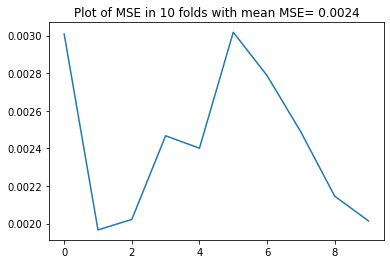

In [118]:
MSE, R_squared = val_doublelog(X_log_yearfixed,y_log_yearfixed, 10)
plt.plot(MSE)
plt.title('Plot of MSE in 10 folds with mean MSE= %0.4f' %np.array(MSE).mean())

In [119]:
print('Average R_squared= %0.4f' %np.array(R_squared).mean())

Average R_squared= 0.7984


## Conclusion 

1. **Summary of results:** Final R_squared: **0.7984** | Final MSE: **0.0024**
2. The signs of the coefficients allign with our research, such as follows:
 - The bigger the weight is, the less energy efficient the car would be
 - All else equal, having the label 'Lux' could imply that the car is more energy efficient than average. THis means that luxury cars are produced to overperform non-luxury ones.
3. The model can be improved by solving multicollinearity or adding more meaningful features.